<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_Minima_Maxima_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minima and maxima

Oftentimes in physics we want to find the minima or maxima of a function.  For example, you may want to find the minimum energy of a quantum system, or the maximum efficiency of a heat engine.  In general, we note that there are both "local" and "global" extrema.  For example, in the function shown below there are multiple local minima and one global minimum.  Finding local minima and maxima is generally easier than finding global ones, and the methods we discuss below will find local extrema, but may not find global ones.

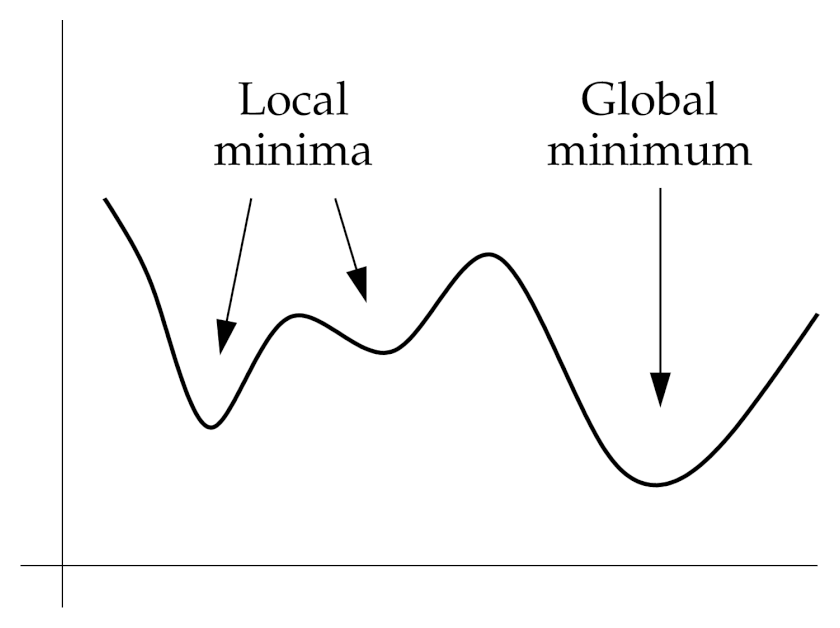

#Gauss-Newton and gradient descent

The natural way to find extrema is by differentiating a function and setting it equal to zero.  For example, for our function $f\left(x\right)$ we would write:

$f'\left(x\right) = 0$

Assuming we can calculate $f'\left(x\right)$, this is merely a root finding problem, and we can use the Newton's method from last class find the solution as:

$x' = x - \frac{f'\left(x\right)}{f''\left(x\right)}$

where $x$ is our current estimate of the extrema, $x'$ is our refined estimate, and $f'\left(x\right)$ and $f''\left(x\right)$ the first and second derivatives.  This is the *Gauss-Newton* method.

While the above will work, oftentimes its difficult (if not impossible) to calculate the second derivative.  A more common approach than Gauss-Newton is to use gradient descent, in which we approximate the above by:

$x' = x - \gamma f'\left(x\right)$

where $\gamma$ is a constant that roughly approximates $1/f''\left(x\right)$. 

In gradient descent, the value of $\gamma$ can be positive or negative.  If it's positive, then at each step of our algorithm we measure the gradient (slope) of our function and move "downhill" along that slope by a value of $ \gamma f'\left(x\right)$.  This will converge towards a local minimum.  If $\gamma$ is negative, then at each step we measure the gradient (slope) of our function and move "uphill" along that slope by a value of $ \gamma f'\left(x\right)$.  This will converge towards a local maximum.  The value of $\gamma$ controls how fast we will converge to either extreme.  

In practice, many values of $\gamma$ will work for a given problem, although it may require some guess and check to ensure you converge to the correct answer.  There are several versions of gradient descent that have been developed that attempt to optimize $\gamma$ and improve convergence, but in this class we'll just choose a value for $\gamma$. 

## Activity
The Buckingham potential approximates the interaction energy between atoms as a function of the distance $r$ between them as:

$V\left(r\right) = V_0 \left[\left(\frac{\sigma}{r}\right)^6 - e^{-\frac{r}{\sigma}}\right]$

The first term in this potential represents the longer range attractive dispersion interaction between atoms, while the second is a repulsive short-range term.  The strength of the interaction, $V_0$, and the  distance $\sigma$ is dependent on the atom types.  This code will generate a plot of this potential for $\sigma = 1.0\$ nm:

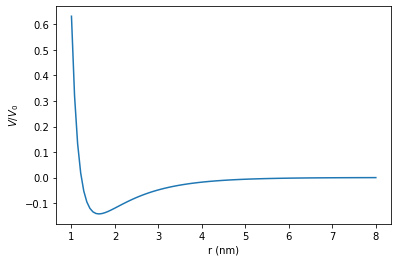

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1.0 # nm

def f(r):
  return (sigma/r)**6 -np.exp(-1.0 * r/sigma)

r = np.linspace(1.0,8.0,100)
V = f(r)
plt.plot(r,V)
plt.xlabel("r (nm)")
plt.ylabel("$V/V_0$")
plt.show()

Note that the derivative of this potential is:

$V'\left(r\right) = V_0 \left[\left(\frac{-6 \sigma^6}{r^7}\right) + \frac{e^{-\frac{r}{\sigma}}}{\sigma}\right]$

Below is a modification of code that we used last time to calculate the root of a nonlinear equation using Newton's method:

In [ ]:
import numpy as np

x = 2.0 #initial guess
epsilon = 1e-8 #convergence criteria
max_iter = 100 #maximum number of iterations to perform

def f(x):
  return x * np.log(1+x) -1

def fprime(x):
  return np.log(1+x) + x/(1+x)

print("Initial estimate of x =",x)

xold = x + epsilon * 10 #old value of x needed for checking our convergence
i = 0 #iteration number

while np.abs(x-xold) > epsilon and i < max_iter:
  xold = x
  x = x - f(x)/fprime(x)
  i += 1
  print("Iteration %i gives x="%i,x)

Initial estimate of x = 2.0
Iteration 1 gives x= 1.3217929813766052
Iteration 2 gives x= 1.2414616734833628
Iteration 3 gives x= 1.2399784096450759
Iteration 4 gives x= 1.2399778876566148
Iteration 5 gives x= 1.2399778876565501


Modify the code above to find the minimum of the Buckingham potential using gradient descent. At each step print the value of the function $f\left(r\right)$ and the location of the estimate of the minimum $r$ to show that the function is being minimized. You should try multiple values of $\gamma$ that span several orders of magnitude to determine how $\gamma$ effects the convergence  of the algorithm.  How does having too large or too small a value of $\gamma$ affect your results?

In [ ]:
import numpy as np

x = 2.0
epsilon = 1e-8 #convergence criteria
max_iter = 100 #maximum number of iterations to perform
gamma = 0.5 #gradient descent value
sigma = 1.0 # nm

def f(r):
  return (sigma/r)**6 -np.exp(-1.0 * r/sigma)

def fprime(r):
  return -6 * sigma **6 / r**7 + np.exp(-1.0 * r /sigma)/ sigma

xold = x + epsilon * 10 #old value of x needed for checking our convergence
i = 0 #iteration number

while np.abs(x-xold) > epsilon and i < max_iter:
  xold = x
  x = x - gamma * fprime(x)
  i += 1
  print("Iteration %3i gives f(r) = %12.9f at r= %8.6f nm"%(i,f(x),x))

Iteration   1 gives f(r) = -0.123586811 at r= 1.955770 nm
Iteration   2 gives f(r) = -0.127278931 at r= 1.912451 nm
Iteration   3 gives f(r) = -0.130686191 at r= 1.870654 nm
Iteration   4 gives f(r) = -0.133710126 at r= 1.831068 nm
Iteration   5 gives f(r) = -0.136269988 at r= 1.794417 nm
Iteration   6 gives f(r) = -0.138319951 at r= 1.761384 nm
Iteration   7 gives f(r) = -0.139861521 at r= 1.732516 nm
Iteration   8 gives f(r) = -0.140944423 at r= 1.708126 nm
Iteration   9 gives f(r) = -0.141653602 at r= 1.688234 nm
Iteration  10 gives f(r) = -0.142087406 at r= 1.672563 nm
Iteration  11 gives f(r) = -0.142336662 at r= 1.660611 nm
Iteration  12 gives f(r) = -0.142472324 at r= 1.651748 nm
Iteration  13 gives f(r) = -0.142542946 at r= 1.645327 nm
Iteration  14 gives f(r) = -0.142578447 at r= 1.640761 nm
Iteration  15 gives f(r) = -0.142595830 at r= 1.637558 nm
Iteration  16 gives f(r) = -0.142604178 at r= 1.635336 nm
Iteration  17 gives f(r) = -0.142608132 at r= 1.633804 nm
Iteration  18 

## Modified gradient descent algorithm

For many functions you can't (or really don't want to) calculate the derivative.  For root-finding, we got around the requirement of numerically estimating the derivative using two points, $x_1$ and $x_2$ and the function value at each point by:

$f'\left(x_2\right) \approx \frac{f\left(x_2\right)-f\left(x_1\right)}{x_2-x_1}$

Here, we can apply the same trick.  We insert this numerical estimate into the gradient descent algorithm to get:

$x_3 = x_2 - \gamma \frac{f\left(x_2\right)-f\left(x_1\right)}{x_2-x_1}$

Where $x_3$ is our new estimate of the extrema's location.  Now, we don't need to calculate the first derivative at all, although like in the secant method we need to keep track of the previous two estimates of the extreme.


## Activity

Below is a modified version of code we used last time for the secant method:

In [ ]:
import numpy as np

x1 = 2.0 #initial estimate 1
x2 = 2.1 #initial estimate 2
epsilon = 1e-8 #convergence criteria
max_iter = 100 #maximum number of iterations to perform

def f(x):
  return x * np.log(1+x) -1

print("Initial estimate of x =",x2)

i = 0 #iteration number
while np.abs(x2-x1) > epsilon and i < max_iter:
  x3 = x2 - f(x2) * (x2 - x1)/(f(x2)-f(x1))
  x1 = x2
  x2 = x3
  i += 1
  print("Iteration %i gives x="%i,x3)

Initial estimate of x = 2.1
Iteration 1 gives x= 1.3301110470847806
Iteration 2 gives x= 1.253070517372598
Iteration 3 gives x= 1.2402460844400982
Iteration 4 gives x= 1.2399787164691956
Iteration 5 gives x= 1.2399778877093137
Iteration 6 gives x= 1.2399778876565501


Modify the above code to use gradient descent to find the minimum of the Buckingham potential.  How does the convergence compare to the case where we have an explicit derivative?

In [ ]:
import numpy as np

x1 = 2.0 #initial estimate 1
x2 = 2.1 #initial estimate 2
epsilon = 1e-8 #convergence criteria
max_iter = 100 #maximum number of iterations to perform
sigma = 1.0 # nm
gamma = 0.5 #gradient descent value

def f(r):
  return (sigma/r)**6 -np.exp(-1.0 * r/sigma)

print("Initial estimate of x =",x2)

i = 0 #iteration number
while np.abs(x2-x1) > epsilon and i < max_iter:
  x3 = x2 - gamma * (f(x2)- f(x1))/ (x2 - x1)
  x1 = x2
  x2 = x3
  i += 1
  print("Iteration %3i gives f(r) = %12.9f at r= %8.6f nm"%(i,f(x2),x2))

Initial estimate of x = 2.1
Iteration   1 gives f(r) = -0.114776300 at r= 2.055433 nm
Iteration   2 gives f(r) = -0.118754508 at r= 2.010787 nm
Iteration   3 gives f(r) = -0.122677370 at r= 1.966234 nm
Iteration   4 gives f(r) = -0.126459214 at r= 1.922209 nm
Iteration   5 gives f(r) = -0.130000478 at r= 1.879258 nm
Iteration   6 gives f(r) = -0.133195435 at r= 1.838034 nm
Iteration   7 gives f(r) = -0.135945918 at r= 1.799283 nm
Iteration   8 gives f(r) = -0.138180027 at r= 1.763794 nm
Iteration   9 gives f(r) = -0.139871191 at r= 1.732317 nm
Iteration  10 gives f(r) = -0.141049327 at r= 1.705453 nm
Iteration  11 gives f(r) = -0.141796098 at r= 1.683526 nm
Iteration  12 gives f(r) = -0.142223133 at r= 1.666498 nm
Iteration  13 gives f(r) = -0.142442557 at r= 1.653958 nm
Iteration  14 gives f(r) = -0.142544021 at r= 1.645209 nm
Iteration  15 gives f(r) = -0.142586540 at r= 1.639411 nm
Iteration  16 gives f(r) = -0.142602875 at r= 1.635744 nm
Iteration  17 gives f(r) = -0.142608710 at r

# Golden Ratio Search

As an alternative to gradient descent, if we know that a region has an extreme in it we can explicitly search for it by incrementally dividing the space into smaller and smaller regions.  This is akin to the bisection method from last class.  However, here we need four points.  Consider the figure below:

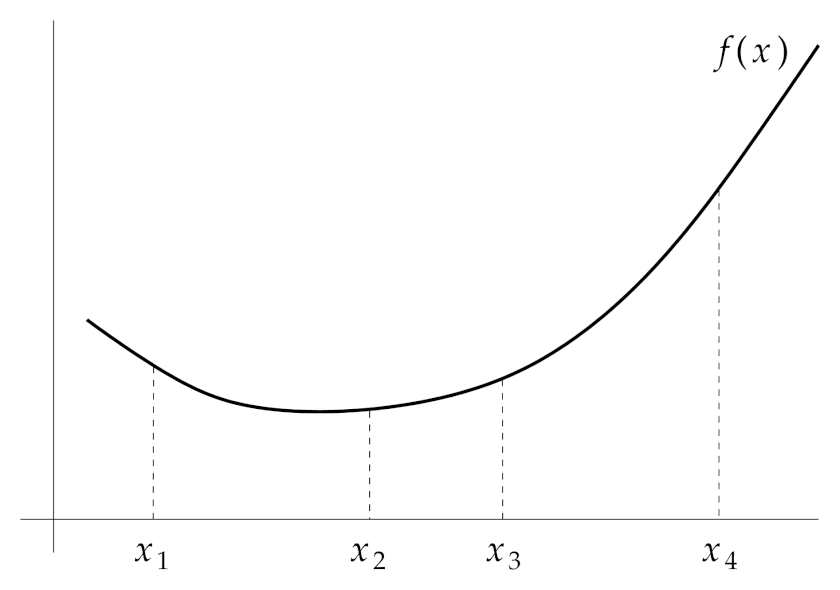

To search for a minimum, the general idea of the algorithm is as follows.  

1.  Pick two initial points, $x_1$ and $x_4$ which are outside of the minimum (that is, these points "bracket" the minimum).  

2.  Use these points to pick two interior points, $x_2$ and $x_3$ (how we choose these points will be discussed below).

3.  Compare the values of the function at $x_2$ and $x_3$.  

 A. If $f\left(x_2\right) < f\left(x_3\right)$ (as in the figure above) then the minimum must be between $x_1$ and $x_3$.  Since we know the minimum must be between $x_1$ and $x_3$, $x_3$ becomes $x_4$ for the next iteration, $x_2$ becomes $x_3$, and we calculate a new value for $x_2$.

 B. If $f\left(x_2\right) > f\left(x_3\right)$ (the opposite of the figure above) then the minimum must be between $x_2$ and $x_4$.  Since we know the minimum must be between $x_2$ and $x_4$, $x_2$ becomes $x_1$ for the next iteration, $x_3$ becomes $x_2$, and we calculate a new value for $x_3$.

4. Repeat steps 2 and 3 above until the space between the points $x_4$ and $x_1$ is smaller than some chosen target accuracy.  At that point, the minimum location is in the middle of $x_4$ and $x_1$.

The only undefined part from the above algorithm is how to pick the interior points, $x_2$ and $x_3$.  In theory, any two points between $x_1$ and $x_4$ will work.  However, for efficiency we want to make sure that at each step we discard the maximum amount of our search space.  For those interested, the algorithm is derived below.  Here, I'll just present the results.  

Given values of $x_1$ and $x_4$, we can calculate $x_2$ and $x_3$ by:

$x_2 = x_4 - \frac{x_4-x_1}{z}$

$x_3 = x_1 + \frac{x_4-x_1}{z}$

$z= \frac{1 + \sqrt{5}}{2}$

where $z$ is the "Golden ratio" (a number that pops up a lot in mathematics).

##Aside: Calculating x2 and x3 (optional)

To determine the positions of $x_2$ and $x_3$ that maximize the efficiency of our search, we make use of two principles.  

First, there's no reason for us to think that that extreme we're looking for is on the left or the right of our interval, so we should not favor one side over the other.  Therefore, we set:

$x_2 - x_1 = x_4 - x_3$ (1)

This is not enough though.  We want to cut out as much search space as possible in each step.  While you might think that means putting $x_2$ and $x_3$ close together at the center would be efficient, it would make the next step inefficient since there would be one of the interior points close to the (new) exterior point.  

To solve this, we define the quantity $z$ to be the ratio of the search space before and after a step in the search process as:

$z = \frac{x_4-x_1}{x_3-x_1} = \frac{x_2 - x_1 + x_3 -x_1}{x_3 - x_1} = 1 + \frac{x_2 - x_1}{x_3 - x_1}$ (2)

where we have used the above relation in equation 1 to simplify.  We can do the same thing for the next step of the algorithm to give:

$z = \frac{x_3 - x_1}{x_2 - x_1}$ (3)

Putting these together gives:

$z = 1 + \frac{1}{z}$ (4)

which has a solution of:

$z = \frac{1 + \sqrt{5}}{2}$  (5)

Therefore, to calculate $x_3$ we can rewrite equation 3 as:

$x_3 = x_1 + \frac{x_4-x_1}{z}$ (6)

A similar relationship can be found for finding $x_2$

## Activity

Below is code that implements the golden ratio search on the function $f\left(x\right) = x^2 + x$.  Run the code and notice has x1 and x4 change in each iteration.  Try changing the code so that the minimum is not included between $x_1$ and $x_4$.  What happens in this case? How can you tell if there is no minimum in the range you initially define?

In [ ]:
import numpy as np

x1 = -2.0
x4 =  2.0
epsilon = 1e-8 #convergence criteria
max_iter = 100 #maximum number of iterations to perform

z = (1.0+np.sqrt(5.0))/2.0 #golden ratio

def f(x):
  return x**2 + x

i = 0
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z
while np.abs(x4-x1) > epsilon and i <max_iter:
  print("Iteration %3i has x1 = %12.8f, x2 = %12.8f, x3 = %12.8f, x4 = %12.8f"%(i,x1,x2,x3,x4))
  if f(x2) < f(x3):
    x4 = x3
    x3 = x2
    x2 = x4 - (x4-x1)/z
  else:
    x1 = x2
    x2 = x3
    x3 = x1 + (x4-x1)/z
  i += 1
print("Iteration %3i has x1 = %12.8f, x2 = %12.8f, x3 = %12.8f, x4 = %12.8f"%(i,x1,x2,x3,x4))
minx = (x4+x1)/2
print("Final estimate for the minimum is x= ", minx)

Iteration   0 has x1 =  -2.00000000, x2 =  -0.47213595, x3 =   0.47213595, x4 =   2.00000000
Iteration   1 has x1 =  -2.00000000, x2 =  -1.05572809, x3 =  -0.47213595, x4 =   0.47213595
Iteration   2 has x1 =  -1.05572809, x2 =  -0.47213595, x3 =  -0.11145618, x4 =   0.47213595
Iteration   3 has x1 =  -1.05572809, x2 =  -0.69504832, x3 =  -0.47213595, x4 =  -0.11145618
Iteration   4 has x1 =  -0.69504832, x2 =  -0.47213595, x3 =  -0.33436854, x4 =  -0.11145618
Iteration   5 has x1 =  -0.69504832, x2 =  -0.55728090, x3 =  -0.47213595, x4 =  -0.33436854
Iteration   6 has x1 =  -0.55728090, x2 =  -0.47213595, x3 =  -0.41951349, x4 =  -0.33436854
Iteration   7 has x1 =  -0.55728090, x2 =  -0.50465843, x3 =  -0.47213595, x4 =  -0.41951349
Iteration   8 has x1 =  -0.55728090, x2 =  -0.52475842, x3 =  -0.50465843, x4 =  -0.47213595
Iteration   9 has x1 =  -0.52475842, x2 =  -0.50465843, x3 =  -0.49223595, x4 =  -0.47213595
Iteration  10 has x1 =  -0.52475842, x2 =  -0.51233594, x3 =  -0.50465

## Activity

Based on the code above, use the golden ration search to find the minimum of the Buckingham potential.  How well does this method converge relative to the gradient descent algorithm above?

In [ ]:
import numpy as np

x1 = 0.5
x4 = 2.5
epsilon = 1e-8 #convergence criteria
max_iter = 100 #maximum number of iterations to perform
sigma = 1.0 # nm

z = (1.0+np.sqrt(5.0))/2.0 #golden ratio

def f(r):
  return (sigma/r)**6 -np.exp(-1.0 * r/sigma)

i = 0
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z
while np.abs(x4-x1) > epsilon and i <max_iter:
  print("Iteration %3i has x1 = %12.8f, x2 = %12.8f, x3 = %12.8f, x4 = %12.8f"%(i,x1,x2,x3,x4))
  if f(x2) < f(x3):
    x4 = x3
    x3 = x2
    x2 = x4 - (x4-x1)/z
  else:
    x1 = x2
    x2 = x3
    x3 = x1 + (x4-x1)/z
  i += 1
print("Iteration %3i has x1 = %12.8f, x2 = %12.8f, x3 = %12.8f, x4 = %12.8f"%(i,x1,x2,x3,x4))
minx = (x4+x1)/2
print("Final estimate for the minimum is x= ", minx, "nm")

Iteration   0 has x1 =   0.50000000, x2 =   1.26393202, x3 =   1.73606798, x4 =   2.50000000
Iteration   1 has x1 =   1.26393202, x2 =   1.73606798, x3 =   2.02786405, x4 =   2.50000000
Iteration   2 has x1 =   1.26393202, x2 =   1.55572809, x3 =   1.73606798, x4 =   2.02786405
Iteration   3 has x1 =   1.26393202, x2 =   1.44427191, x3 =   1.55572809, x4 =   1.73606798
Iteration   4 has x1 =   1.44427191, x2 =   1.55572809, x3 =   1.62461180, x4 =   1.73606798
Iteration   5 has x1 =   1.55572809, x2 =   1.62461180, x3 =   1.66718427, x4 =   1.73606798
Iteration   6 has x1 =   1.55572809, x2 =   1.59830056, x3 =   1.62461180, x4 =   1.66718427
Iteration   7 has x1 =   1.59830056, x2 =   1.62461180, x3 =   1.64087304, x4 =   1.66718427
Iteration   8 has x1 =   1.59830056, x2 =   1.61456180, x3 =   1.62461180, x4 =   1.64087304
Iteration   9 has x1 =   1.61456180, x2 =   1.62461180, x3 =   1.63082304, x4 =   1.64087304
Iteration  10 has x1 =   1.62461180, x2 =   1.63082304, x3 =   1.63466